In [10]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [18]:
# 動画の読み込み
cap = cv2.VideoCapture('../input/movie/raw/timelapse.mp4')

KERNEL_SIZE = 15

# calculated confluency list
conflu_list = []


while True:
    ret, frame = cap.read()

    if not ret:
        break

    # gray scale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # binarization using Otsu's method
    _, th = cv2.threshold(frame_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # configure the kernel
    kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE),np.uint8)

    # morphological transformation(Dilation)
    th_dilation = cv2.dilate(th, kernel, iterations = 1)
    
    # contour extraction
    contours, hierarchy = cv2.findContours(th_dilation,
                                           cv2.RETR_LIST,
                                           cv2.CHAIN_APPROX_NONE)

    # draw the contours on the source image
    img_contour = cv2.drawContours(frame.copy(), contours, -1, (0, 255, 0), 2)

    # total number of pixels
    whole_area = th_dilation.size

    # number of zero area pixels
    white_area = cv2.countNonZero(th_dilation)

    # calculate confluency
    confluency = int(white_area / whole_area * 100)

    # append to list
    conflu_list.append(confluency)




In [25]:
# make dataframe
df = pd.DataFrame(conflu_list, columns=['confluency'])
df['frame'] = df.index
df.set_index('frame',inplace=True)

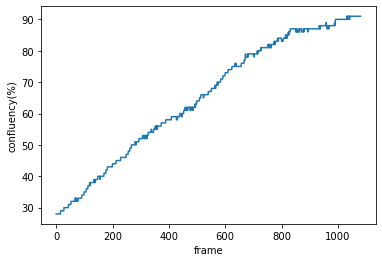

In [20]:
plt.plot(conflu_list)
plt.xlabel('frame')
plt.ylabel('confluency(%)')
plt.show()